# **Precidicting Who will Leave the job?**

# **Subject: Employee Attrition Analysis**
# **Description**:

*Employee attrition, or turnover, is a critical issue for many organizations. High turnover rates can lead to increased recruitment and training costs, loss of organizational knowledge, and decreased morale among remaining employees. The “Leave or Not from Job” project aims to analyze various factors that influence an employee’s decision to leave the company. By understanding these factors, organizations can implement strategies to improve employee retention, enhance job satisfaction, and ultimately reduce turnover rates.*

# **Why We Are Analyzing It:**
**Cost Reduction:** *High turnover rates are costly. By identifying the key factors that lead to employee attrition, organizations can take proactive measures to retain employees, thereby reducing recruitment and training expenses.
Employee Satisfaction: Understanding the reasons behind employee turnover can help organizations improve their work environment and policies, leading to higher job satisfaction and employee engagement.*

**Productivity Improvement:** *Retaining experienced employees ensures continuity and stability within the organization, leading to higher productivity and better performance.
Strategic Planning: Insights from attrition analysis can inform strategic HR decisions, such as targeted retention programs and personalized career development plans.*

# **What We Will Gain from This Analysis:**
**Identification of Key Factors:** *Determine the main reasons why employees leave the organization, such as job satisfaction, work-life balance, compensation, career growth opportunities, and management practices.
Predictive Insights: Develop predictive models to identify employees at risk of leaving, allowing for timely interventions.*

**Data-Driven Decisions:** *Use data to inform HR policies and practices, ensuring they are aligned with employee needs and organizational goals.*

**Improved Retention Strategies:** *Design and implement effective retention strategies based on the analysis, such as mentorship programs, flexible work arrangements, and competitive compensation packages.
Enhanced Organizational Culture: Foster a positive organizational culture by addressing the root causes of employee dissatisfaction and turnover.*

> By conducting this analysis, organizations can create a more supportive and engaging work environment, ultimately leading to a more stable and productive workforce. If you have any specific questions or need further details, feel free to ask!

# **Step 1: Import Libraries**
Begin by importing the necessary libraries for data manipulation, visualization, and modeling. Common libraries include **pandas**, **numpy**, **matplotlib**, **seaborn**, **scikit-learn**, and **xgboost**.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


# **Step 2: Load the Dataset**
Load the dataset into a pandas DataFrame. Ensure your dataset is clean and formatted correctly for analysis. You can use pd.read_csv() to load a CSV file.

In [3]:
df = pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# **Step 3: Explore the Dataset**
Perform an initial exploration of your dataset. This includes:

Viewing the first few rows with df.head().
Checking the data types and missing values with df.info().
Getting summary statistics with df.describe().

In [4]:
df.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
(df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [7]:
datadesc = []
for i in df.columns:
    datadesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,Education,object,0,0,3,"[PHD, Masters]"
1,JoiningYear,int64,0,0,7,"[2012, 2016]"
2,City,object,0,0,3,"[Bangalore, Pune]"
3,PaymentTier,int64,0,0,3,"[1, 3]"
4,Age,int64,0,0,20,"[24, 40]"
5,Gender,object,0,0,2,"[Male, Female]"
6,EverBenched,object,0,0,2,"[No, Yes]"
7,ExperienceInCurrentDomain,int64,0,0,8,"[5, 7]"
8,LeaveOrNot,int64,0,0,2,"[1, 0]"


## **Handling missing value**


In [6]:
df.isna().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
df["LeaveOrNot"].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [9]:
def missing_values_table(dataframe, na_name=False):
    # The columns name that contains missing value
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    # Number of missing data
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    # Ration of the missing data points over the dataset
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    # Missing dataframe
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns


missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [10]:
df = df.drop_duplicates()
df.shape

(2764, 9)

In [13]:
# Convert 'EverBenched' to binary
df['EverBenched'] = df['EverBenched'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 4: Data Visualization
Visualize the data to understand relationships and distributions:

Correlation Matrix: Use a heatmap to visualize correlations between features.
Target Variable Distribution: Use a count plot to visualize the distribution of the target variable.

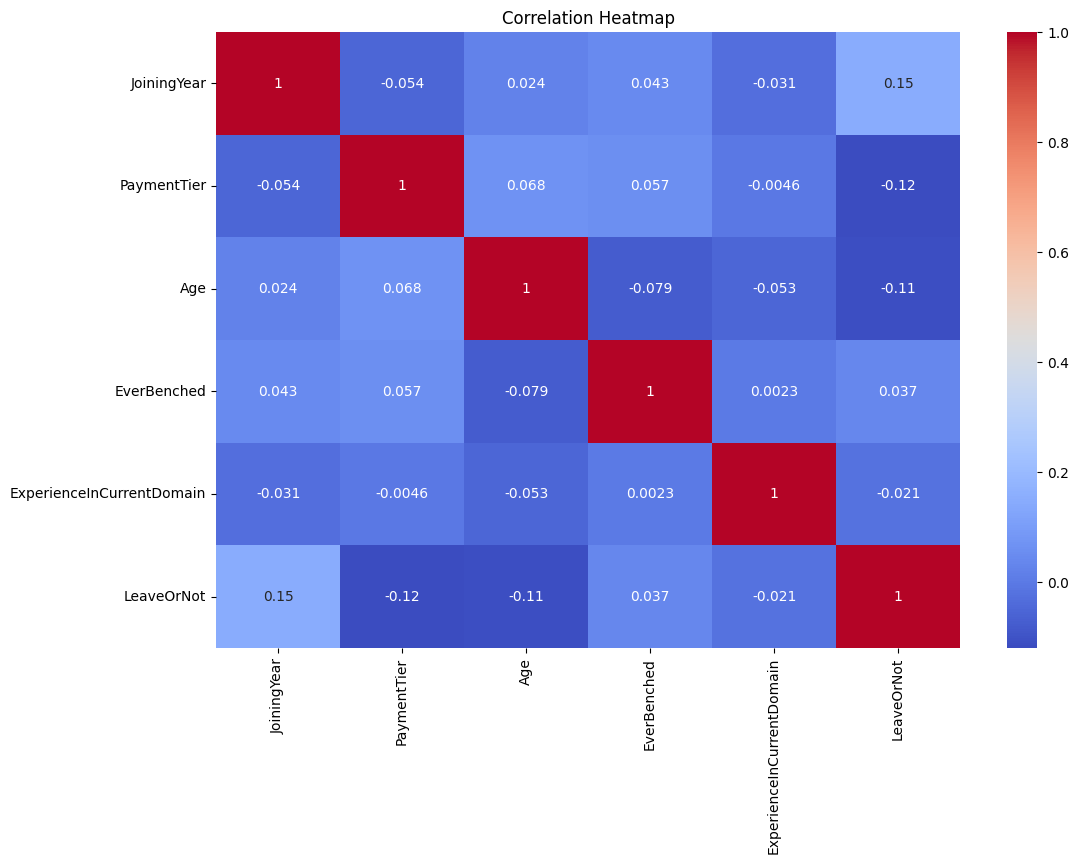

In [15]:
# Step 1: Calculate correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

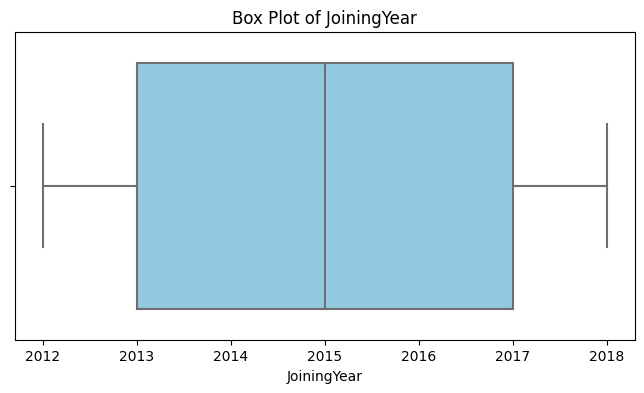

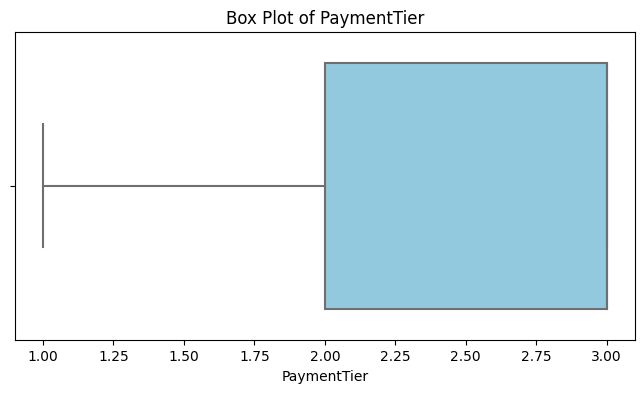

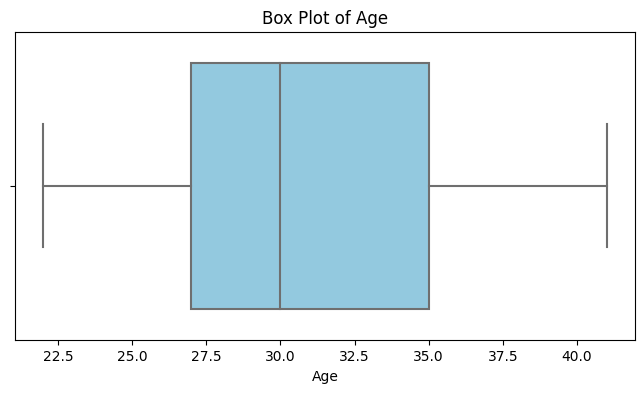

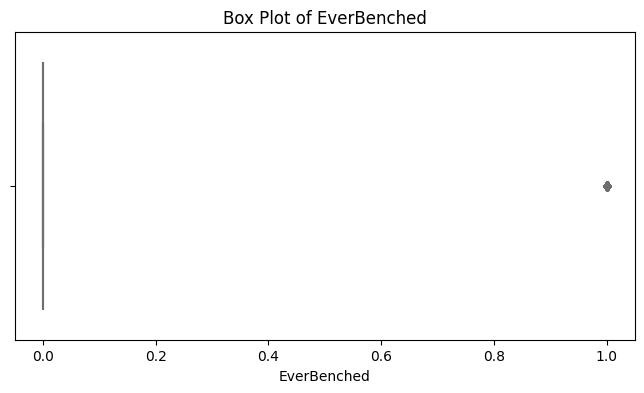

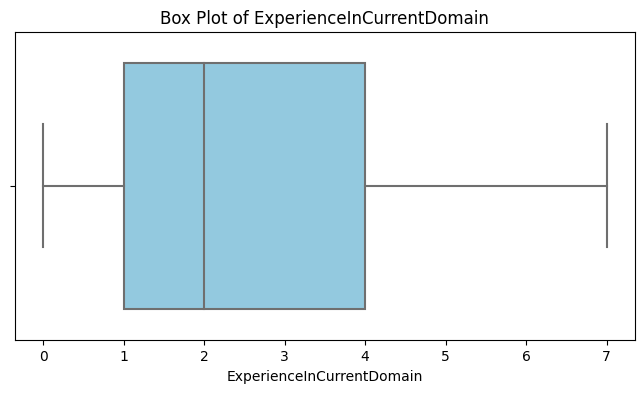

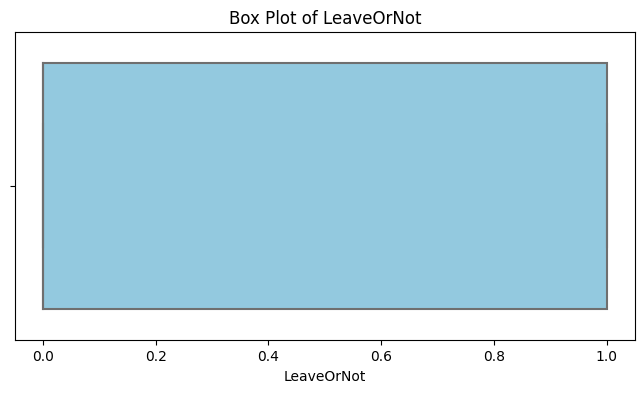

None


In [16]:
def visualize_dataset_distribution(data):
    # Ensure that data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a DataFrame")

    # Get the number of columns in the DataFrame
    num_columns = data.shape[1]

    # Create separate plots for each column
    for i, column in enumerate(data.columns):
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column], orient='h', color='skyblue')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()


print(visualize_dataset_distribution(numeric_df))

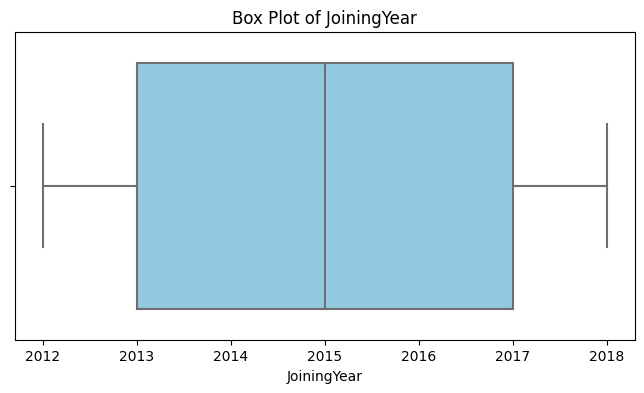

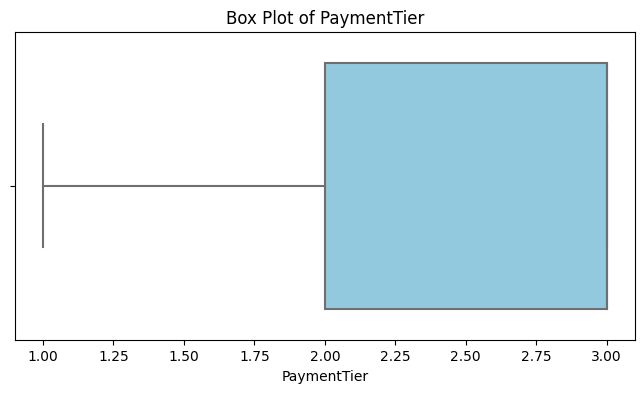

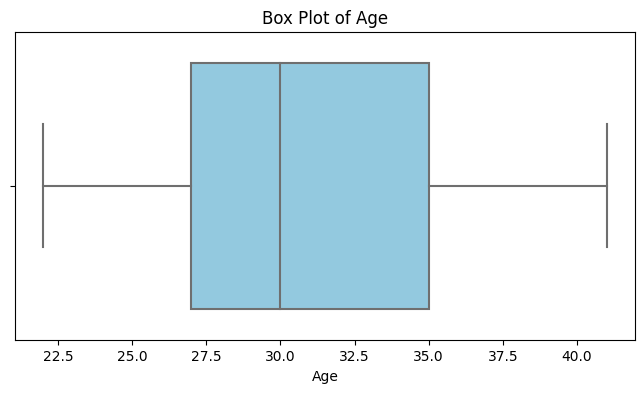

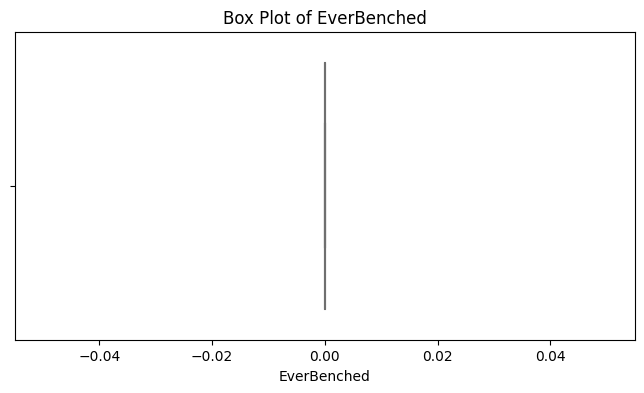

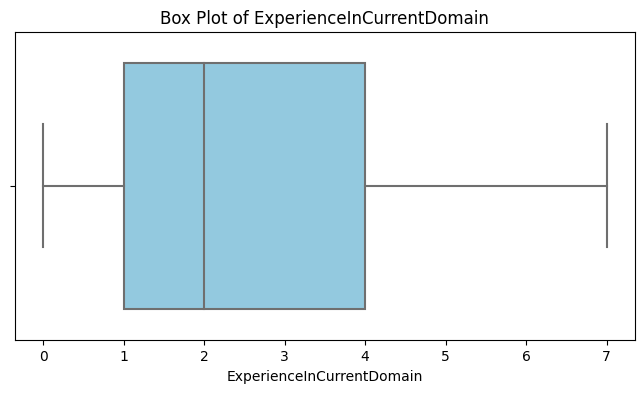

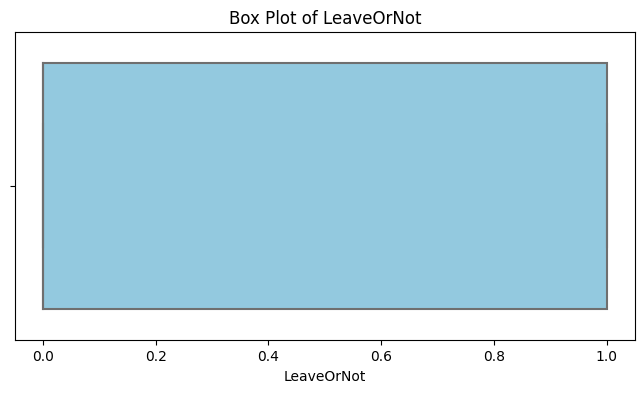

None


In [17]:
def cap_outliers(data, columns_to_exclude=[]):
    capped_data = data.copy()  # Create a copy of the original DataFrame

    # Get the list of columns to process by excluding the specified columns
    columns_to_process = [col for col in data.columns if col not in columns_to_exclude]

    for column in columns_to_process:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3 - q1

        # Calculate the max and min limits for capping
        max_limit = q3 + (1.5 * IQR)
        min_limit = q1 - (1.5 * IQR)

        # Cap the values within the limits
        capped_data[column] = np.where(capped_data[column] > max_limit, max_limit,
                                       np.where(capped_data[column] < min_limit, min_limit, capped_data[column]))

    return capped_data

capped_df = cap_outliers(numeric_df, columns_to_exclude=["LeaveOrNot"])
print(visualize_dataset_distribution(capped_df))

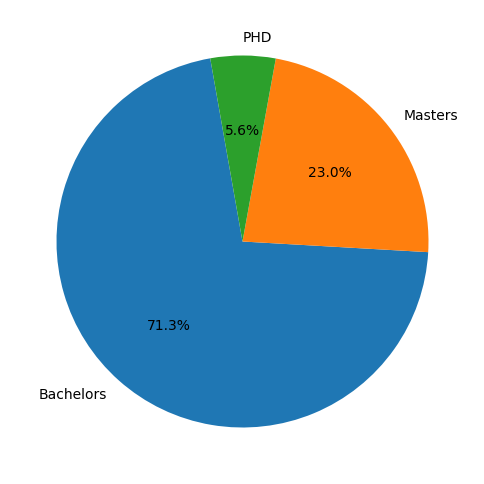

In [8]:
edu_count=df.Education.value_counts()
plt.figure(figsize=(6, 8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

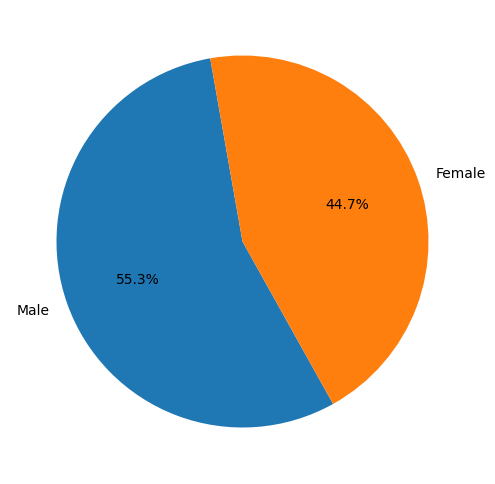

In [9]:
edu_count=df.Gender.value_counts()
plt.figure(figsize=(6, 8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

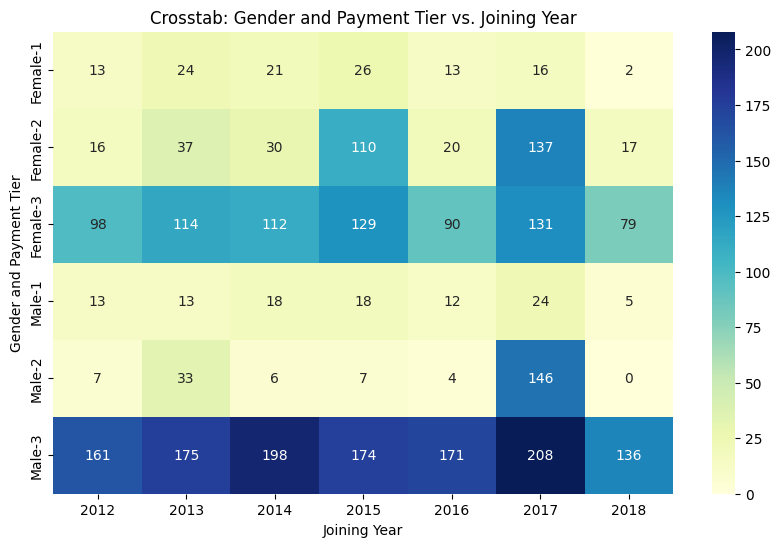

In [11]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

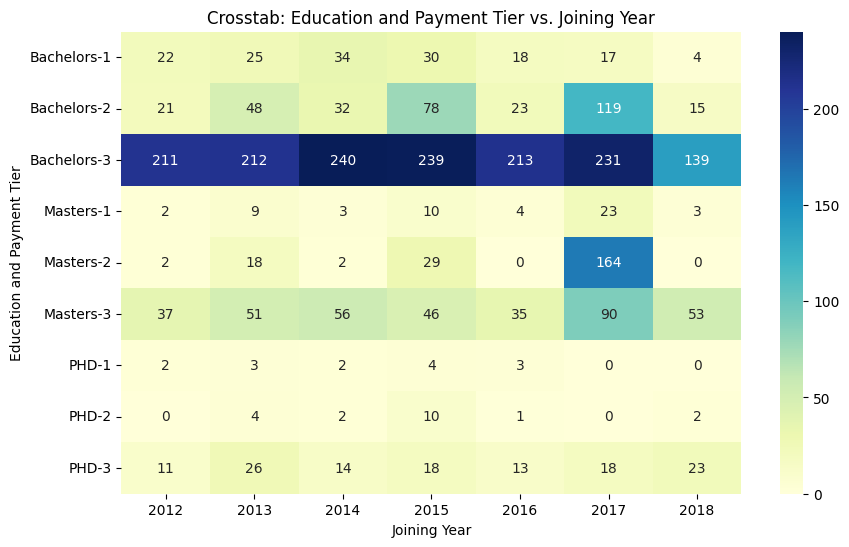

In [13]:
x=pd.crosstab([df.Education,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Joining Year')
plt.ylabel('Education and Payment Tier')
plt.title('Crosstab: Education and Payment Tier vs. Joining Year')
plt.show()

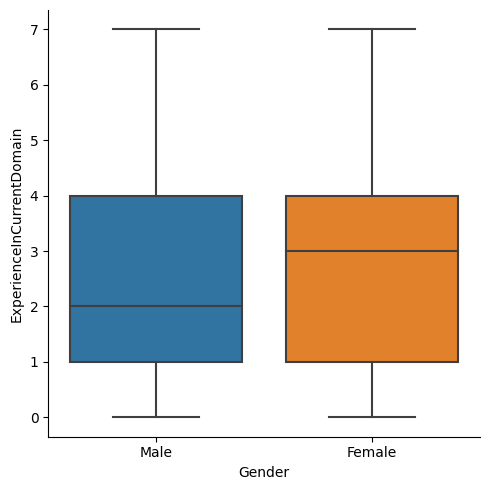

In [14]:
sns.catplot(data=df,x='Gender',y='ExperienceInCurrentDomain',kind='box')


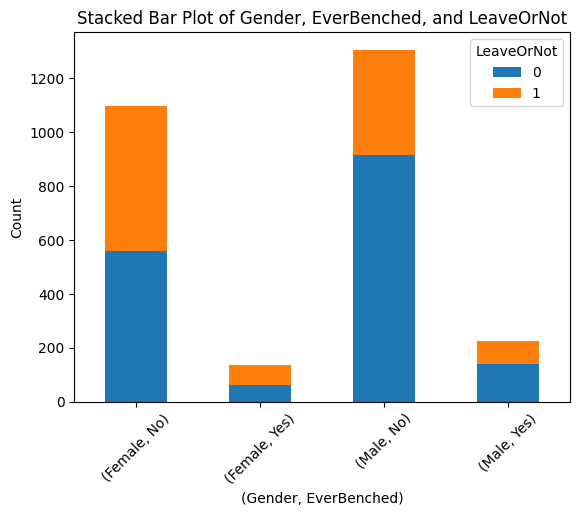

In [16]:
x=pd.crosstab([df.Gender,df.EverBenched],df.LeaveOrNot)
x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

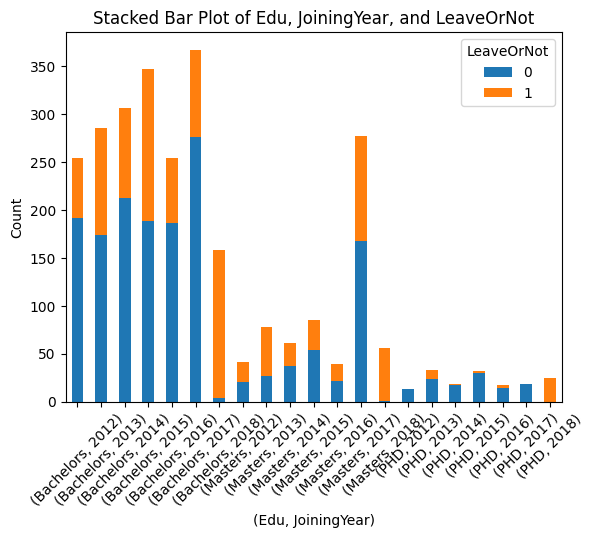

In [20]:
joincrosseducation=pd.crosstab([df.Education,df.JoiningYear],df.LeaveOrNot)
joincrosseducation.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Edu, JoiningYear, and LeaveOrNot')
plt.xlabel('(Edu, JoiningYear)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Step 5: Data Preprocessing
Prepare your data for modeling:

Handling Missing Values: Fill or drop missing values as appropriate.
Encoding Categorical Variables: Convert categorical variables into numerical format using techniques like one-hot encoding.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


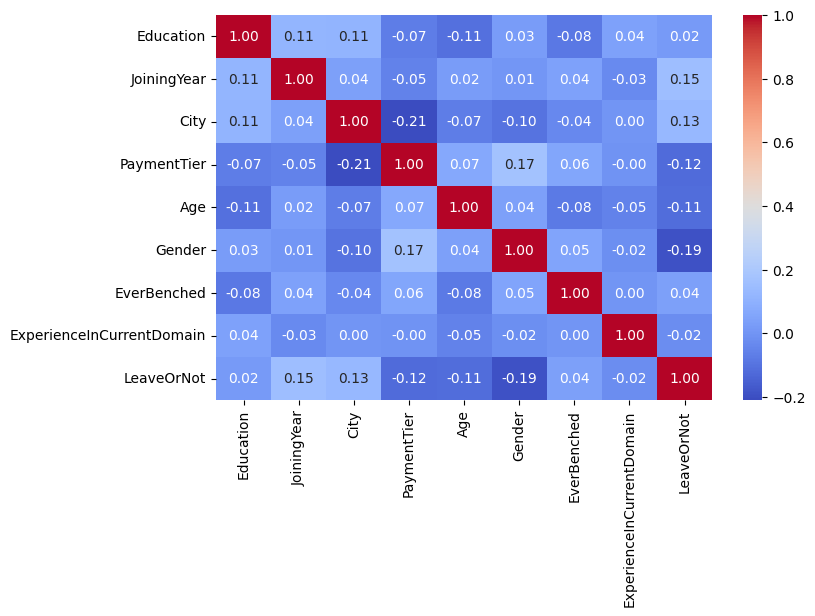

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [21]:
#Dataset splitting

X = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']


features_train, features_test, target_train, target_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

print(features_train.shape)
print(features_test.shape)


(1934, 8)
(830, 8)


In [22]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(features_train, target_train)

In [23]:
x_train_smote.shape, y_train_smote.shape


((2358, 8), (2358,))

# Step 6: Train the Model with XGBoost, RandomForest and Decision Tree
Train an XGBoost model on your training data. XGBoost is a powerful gradient boosting algorithm that can handle various types of data and is known for its performance.

In [24]:
#Building Models

#Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_smote,y_train_smote)
print(dt.score(features_test,target_test)*100)
dt_pred = dt.predict(features_test)
print(confusion_matrix(target_test,dt_pred))
print(classification_report(target_test,dt_pred))
DTAcc = accuracy_score(dt_pred,target_test)


75.42168674698794
[[435  62]
 [142 191]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       497
           1       0.75      0.57      0.65       333

    accuracy                           0.75       830
   macro avg       0.75      0.72      0.73       830
weighted avg       0.75      0.75      0.75       830



In [26]:
# Generate values
depth = [i for i in range(2,21,1)]
samples = [i for i in range(50,500,50)]
parameters = dict(max_depth=depth, min_samples_leaf=samples)
from sklearn.model_selection import GridSearchCV
parameters = dict(max_depth=depth, min_samples_leaf=samples)
param_search = GridSearchCV(dt, parameters)
param_search.fit(x_train_smote, y_train_smote)
print(param_search.best_params_)


#Random Forest
rf= RandomForestClassifier(n_estimators=500)
rf.fit(x_train_smote,y_train_smote)
rf_pred=rf.predict(features_test)
print(confusion_matrix(target_test,rf_pred))
print(classification_report(target_test,rf_pred))
RFAcc = accuracy_score(rf_pred,target_test)

{'max_depth': 5, 'min_samples_leaf': 50}
[[362 135]
 [112 221]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       497
           1       0.62      0.66      0.64       333

    accuracy                           0.70       830
   macro avg       0.69      0.70      0.69       830
weighted avg       0.71      0.70      0.70       830



In [27]:
#XGBoost
import xgboost as xgb
xgboost = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 5, subsample= 1)
xgboost.fit(x_train_smote,y_train_smote)
xg_pred = xgboost.predict(features_test)
print(confusion_matrix(target_test,xg_pred))
print(classification_report(target_test,xg_pred))
XGAcc = accuracy_score(xg_pred,target_test)

##GRID SEARCH
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_smote, y_train_smote)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

##RANDOMIZEDSEARCH
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 7),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train_smote, y_train_smote)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

[[412  85]
 [101 232]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       497
           1       0.73      0.70      0.71       333

    accuracy                           0.78       830
   macro avg       0.77      0.76      0.76       830
weighted avg       0.77      0.78      0.77       830

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
Best score:  0.7803222498110763
Best set of hyperparameters:  {'learning_rate': 0.08406459639078341, 'max_depth': 5, 'n_estimators': 56, 'subsample': 0.9475978336884323}
Best score:  0.7803177516283423


In [34]:

compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
                        'Accuracy': [DTAcc*100,RFAcc*100, XGAcc*100]})
print(compare.sort_values(by='Accuracy', ascending=False))


           Model   Accuracy
2        XGBoost  77.590361
0  Decision Tree  75.421687
1  Random Forest  70.240964


In [41]:
pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


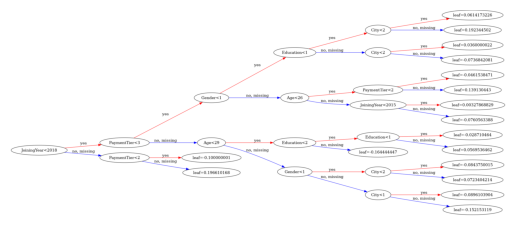

<Figure size 640x480 with 0 Axes>

In [45]:
from xgboost import plot_tree
feature_names = x_train_smote.columns
target_names = ['0', '1']


import os
tree_index = 0
plot_tree(xgboost, num_trees=tree_index, rankdir='LR')  # 'LR' for left-to-right orientation
plt.show()
plt.savefig("temp.pdf")

# Step 7: Feature Selection
Separate your dataset into features (X) and the target variable (y). Split the data into training and testing sets using train_test_split() from scikit-learn.

                     Feature  Importance
1                JoiningYear    0.194871
0                  Education    0.165015
5                     Gender    0.162639
3                PaymentTier    0.156972
2                       City    0.114695
6                EverBenched    0.078813
4                        Age    0.072170
7  ExperienceInCurrentDomain    0.054824


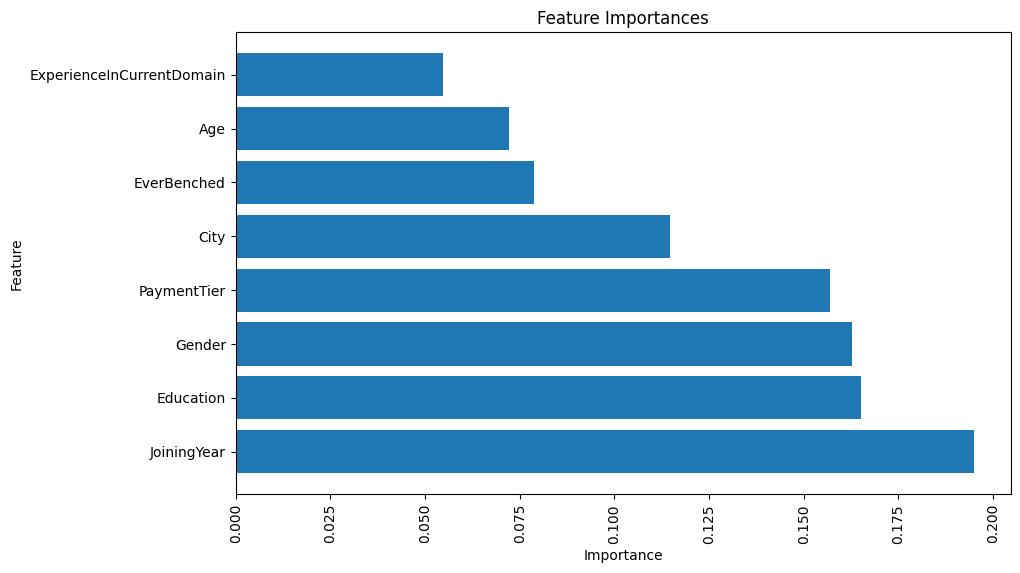

In [29]:
#Feature Importance

importances = xgboost.feature_importances_
feature_names = x_train_smote.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_df)

plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Feature'], sorted_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

# plt.hist(features_train['NpsAndDfkidem'])
# plt.show()